In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [29]:
# Veri setini oku
data_path = "/content/veri-seti.txt"
column_names = ["NOTP", "2HTT", "DBP", "TST", "2HSI", "BMI", "DBF", "AGE", "Class"]
dataset = pd.read_csv(data_path, names=column_names, sep="\t")

# Veri setini öznitelikler ve hedef değişken olarak ayır
X = dataset.drop('Class', axis=1)
y = dataset['Class']

In [30]:
# 1. Normalizasyon
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


In [31]:
# 2. PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

# 3. LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_normalized, y)

# 4. Eğitim ve test verisi bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=54)


In [32]:
# Çoklu Doğrusal Regresyon analizi
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_coef = linear_reg.coef_

# Multinominal Lojistik Regresyon analizi
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg_coef = logistic_reg.coef_


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
# 5. Karar Ağacı Sınıflandırma
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

In [34]:
# 6. Naive Bayes Sınıflandırıcısı
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nb_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)

In [35]:
# Sonuçları raporla
print("Çoklu Doğrusal Regresyon Katsayıları:")
print(linear_reg_coef)
print("\nMultinominal Lojistik Regresyon Katsayıları:")
print(logistic_reg_coef)

print("\nKarar Ağacı Sınıflandırma Performansı:")
print("Confusion Matrix:")
print(dt_conf_matrix)
print("Accuracy:", dt_accuracy)

print("\nNaive Bayes Sınıflandırıcısı Performansı:")
print("Confusion Matrix:")
print(nb_conf_matrix)
print("Accuracy:", nb_accuracy)

Çoklu Doğrusal Regresyon Katsayıları:
[ 2.36459420e-02  5.35526878e-03 -1.47972563e-03 -1.91212424e-04
 -7.76779133e-05  1.18906423e-02  1.38261160e-01  4.17712490e-03]

Multinominal Lojistik Regresyon Katsayıları:
[[ 1.54915072e-01  3.02894273e-02 -1.15324751e-02 -8.76960962e-03
   9.01513700e-05  7.03491299e-02  1.22565376e+00  2.86497963e-02]]

Karar Ağacı Sınıflandırma Performansı:
Confusion Matrix:
[[125  27]
 [ 36  43]]
Accuracy: 0.7272727272727273

Naive Bayes Sınıflandırıcısı Performansı:
Confusion Matrix:
[[127  25]
 [ 46  33]]
Accuracy: 0.6926406926406926


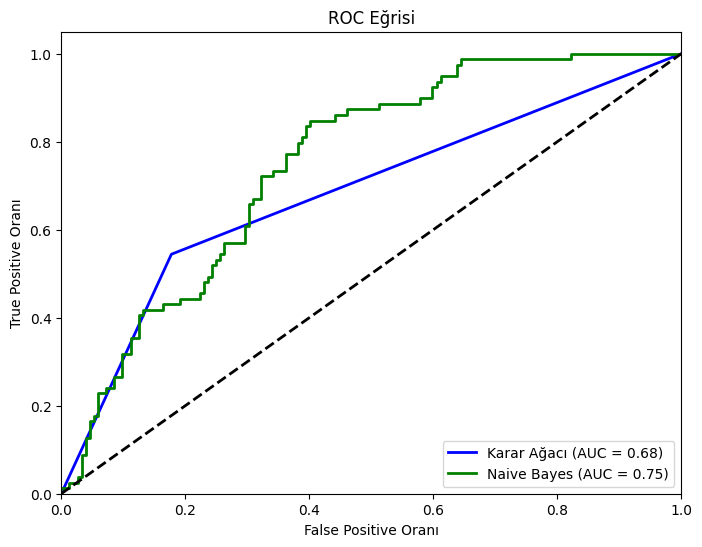

In [36]:
# Karar Ağacı Sınıflandırma Performansı için ROC eğrisi
dt_probs = dt_classifier.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Naive Bayes Sınıflandırıcısı Performansı için ROC eğrisi
nb_probs = nb_classifier.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# ROC eğrilerini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='Karar Ağacı (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

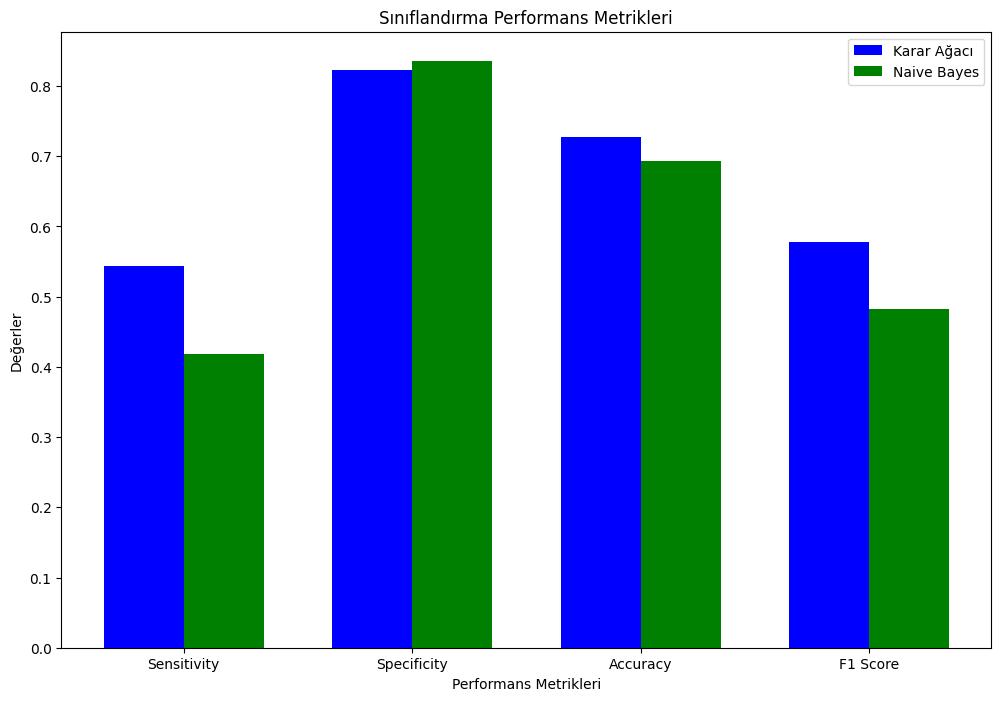

In [37]:
import numpy as np

# Karar Ağacı Sınıflandırma Performansı
dt_sensitivity = dt_conf_matrix[1, 1] / (dt_conf_matrix[1, 1] + dt_conf_matrix[1, 0])
dt_specificity = dt_conf_matrix[0, 0] / (dt_conf_matrix[0, 0] + dt_conf_matrix[0, 1])
dt_accuracy = (dt_conf_matrix[0, 0] + dt_conf_matrix[1, 1]) / np.sum(dt_conf_matrix)
dt_precision = dt_conf_matrix[1, 1] / (dt_conf_matrix[1, 1] + dt_conf_matrix[0, 1])
dt_recall = dt_sensitivity
dt_f1_score = 2 * (dt_precision * dt_recall) / (dt_precision + dt_recall)

# Naive Bayes Sınıflandırıcısı Performansı
nb_sensitivity = nb_conf_matrix[1, 1] / (nb_conf_matrix[1, 1] + nb_conf_matrix[1, 0])
nb_specificity = nb_conf_matrix[0, 0] / (nb_conf_matrix[0, 0] + nb_conf_matrix[0, 1])
nb_accuracy = (nb_conf_matrix[0, 0] + nb_conf_matrix[1, 1]) / np.sum(nb_conf_matrix)
nb_precision = nb_conf_matrix[1, 1] / (nb_conf_matrix[1, 1] + nb_conf_matrix[0, 1])
nb_recall = nb_sensitivity
nb_f1_score = 2 * (nb_precision * nb_recall) / (nb_precision + nb_recall)

# Grafik boyutunu ve konfigürasyonu ayarlayın
plt.figure(figsize=(12, 8))

# Sensitivity, Specificity, Accuracy ve F1 Score için çubuk grafik çizin
metrics = ['Sensitivity', 'Specificity', 'Accuracy', 'F1 Score']
dt_metrics = [dt_sensitivity, dt_specificity, dt_accuracy, dt_f1_score]
nb_metrics = [nb_sensitivity, nb_specificity, nb_accuracy, nb_f1_score]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, dt_metrics, width, label='Karar Ağacı', color='blue')
plt.bar(x + width/2, nb_metrics, width, label='Naive Bayes', color='green')

plt.xlabel('Performans Metrikleri')
plt.ylabel('Değerler')
plt.title('Sınıflandırma Performans Metrikleri')
plt.xticks(x, metrics)
plt.legend()
plt.show()